# Intro into Statistics
## Measuring Central Tendency
Statistical analysis is at the core of data science. Using statstic we learn about the distribution of the data, how much of variance there is between values and how values for one feature of the data influence other values. We will start with the common decriptive statistics. Lets get started by loading out data!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(13)
df = pd.read_csv('data/Lemonade-2.csv', index_col = 'Date', parse_dates = True, na_values = 'nan' )
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue,Unnamed: 8
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.3,10,3.0,NaN
2017-01-02,Monday,28.9,1.33,15,0.3,13,3.9,NaN
2017-01-03,Tuesday,34.5,1.33,27,0.3,15,4.5,NaN
2017-01-04,Wednesday,44.1,1.05,28,0.3,17,5.1,NaN
2017-01-05,Thursday,42.4,1.00,33,0.3,18,5.4,NaN


Lets take a closer look at the Temperature field and randomly sample 20 dates without replacment.

In [2]:
df_subsample = df["Temperature"].sample(20).sort_index()
df_subsample 

Date
2017-01-08    37.5
2017-01-13    37.5
2017-01-28    34.9
2017-03-03    60.2
2017-03-15    56.2
2017-04-12    66.1
2017-04-21    67.1
2017-05-29    66.7
2017-06-01    71.3
2017-06-27    75.3
2017-08-03    75.0
2017-08-14    72.6
2017-09-06    71.7
2017-09-09    64.8
2017-10-15    61.5
2017-10-29    61.5
2017-12-04    34.9
2017-12-13    32.2
2017-12-16    35.5
2017-12-17    32.2
Name: Temperature, dtype: float64

We may want to sort our data by temperature values. 

In [3]:
df_subsample.sort_values(inplace = True)
df_subsample

Date
2017-12-17    32.2
2017-12-13    32.2
2017-01-28    34.9
2017-12-04    34.9
2017-12-16    35.5
2017-01-08    37.5
2017-01-13    37.5
2017-03-15    56.2
2017-03-03    60.2
2017-10-15    61.5
2017-10-29    61.5
2017-09-09    64.8
2017-04-12    66.1
2017-05-29    66.7
2017-04-21    67.1
2017-06-01    71.3
2017-09-06    71.7
2017-08-14    72.6
2017-08-03    75.0
2017-06-27    75.3
Name: Temperature, dtype: float64

From the list we are able to quickly find the min which is the first value in the data and the max which is the last value of the data. In this example it is 87.62 and 195.26 with the power of numpy we can quicky return these values with a line of code.

In [4]:
df_subsample.min()

32.2

In [5]:
df_subsample.max()

75.3

In [6]:
df_subsample.mean()

55.735

In [7]:
df_subsample.describe()

count    20.000000
mean     55.735000
std      16.402191
min      32.200000
25%      37.000000
50%      61.500000
75%      68.150000
max      75.300000
Name: Temperature, dtype: float64

If we were looking to return just max or the min we would only require calling the function min() or max() but we may also use .describe() to get all our descriptive statistics with a single line of code.

Given max and min we know the values of the data at its extremes and we may assume a tipical value lay somewhere in the middle. If we are dealing with a full populataion of data we can calculate our mean by suming up all values then dividing by the total number of values summed. Below we have the formual where the greek better Mu symbolizes the mean or average value of the data.
# $\mu = \frac{\sum_{i=1}^{N} X_i}{N}$

In our case we are data is a subset of the full population so we would represent our mean value with an x with bar over it. 
# $\overline{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

Our mean might not accurately represent our typical value, say in the case there we had a few days that were extremely hot and move the average temperature of the mean up. So and alturnative to the average value is to take the median. you will sort the values and select the middle value, if your number of observations is odd then that alone is all we need, but if our observations is even we select the two most middle values and average them. With 

In [8]:
df_subsample.median()

61.5

Another descriptive statistic we may want too look at is the mode, we can see which value occurs more frequent than the others. 

In [9]:
df_subsample.mode()

0    32.2
1    34.9
2    37.5
3    61.5
dtype: float64

Displaying our data with a histogram will allow use to get a feel for where the data lies.

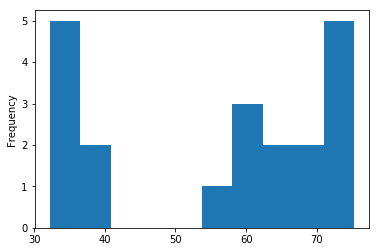

In [10]:
df_subsample.plot(kind='hist')

From our histogram it seems that our sampled data is not evenly distrubuted or even normally distributed. We see that our min and our max values seem very frequent while values near our mean and medium seem to be not as common. When sampling from our data we might have been unlucky with our sampling which in turn would give us poor results. Lets try what our histogram would look like if we had all our data.

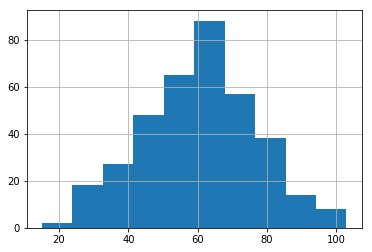

In [11]:
df['Temperature'].hist()

That looks much better, our data looks very simliar to a bell curve which we like to call a normal distribution. We know what it was sampling that was the problem in of histogram of our sampled data frame.
Another Chart that is helpful is look at ist a box plot, all values in the box represent the middle 50 percent of the data and the line in the middle represents the median. The wiskers represent the values of teh upper and lower bouns and any values outside are consider outliers.

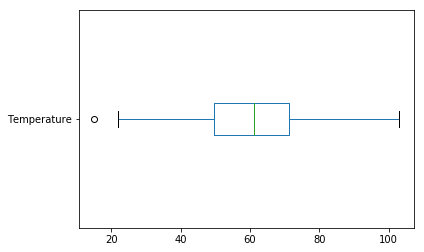

In [12]:
df['Temperature'].plot(kind = 'box',vert=False)

## Measuring Variance
Above our histogram has some variation in values near the mean. There is a mathmatical calculation for this called variance which is represent by the greek letter Sigma squared, where sigma is standard deviation.  
# $\sigma^{2} = \frac{\sum_{i=1}^{N} (X_i - \mu)^{2} }{N}$

In the case of dealing with a sample of data we want to change the formual to allow for bias in the sample. 
# $s^{2} = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^{2} }{n-1}$

Now lets find the variance for the population of data.

In [13]:
df["Temperature"].var()

262.3190218274874

We can just as easily find the variance of our sampled data witht he line of code below. 

In [14]:
df_subsample.var(ddof = 1)

269.0318684210526

What does our variance value mean? What does a variance of 262 or 269 mean? Since the values were squared it is not longer in the same scale. What we can do is to calculate the squared root of variance to turn us something called standard deviation.
# $\sigma = \sqrt{\frac{\sum_{i=1}^{N} (X_i - \mu)^{2} }{N}}$

Similarly to get the standard deviation of our sampled data we can use the formula below.
# $s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \overline{x})^{2} }{n-1}}$

Let try it out below.

In [15]:
df["Temperature"].std()

16.19626567537985

In [16]:
df_subsample.std(ddof = 1)

16.40219096404662

The standard deviation on our population data is around 16.1962, this number represents how spread out our values are. Statastians love a normal distribution as the mean is in the middle and around 68.26% of all observations lie within one standard deviation above or below the mean. Around 95% of observations lie within two standarad deviations of the mean and around 99.73% of ovservations lie within three standard deviations of the mean. If you had look at mean squared error before in linear regression we can see that variance measures the spread of the data around the mean (in squared units), while the mean squared error measures the vertical spread of the data around the regression line (in squared vertical units).

## Skewed Distibutions
It important to realize that not all data will have a normal distribution and is often the case that the distribution of data is skewed by some high or low value affecting the centrality of the mean. 



In [17]:
df_subsample_rain = df["Rainfall"].sample(100).sort_index()
df_subsample_rain.head()


Date
2017-01-01    2.00
2017-01-05    1.00
2017-01-07    1.54
2017-01-11    1.54
2017-01-15    1.11
Name: Rainfall, dtype: float64

In [18]:
print('max:', df_subsample_rain.max())
print('min:', df_subsample_rain.min())
print('mode:', df_subsample_rain.mode())
print('mean:', df_subsample_rain.mean())
print('median:', df_subsample_rain.median())


max: 2.5
min: 0.47
mode: 0    0.67
dtype: float64
mean: 0.8645000000000006
median: 0.77


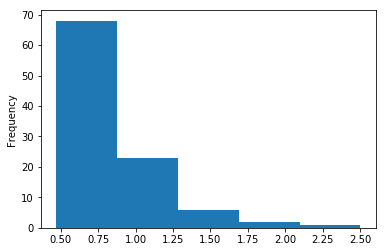

In [19]:
df_subsample_rain.plot(kind = 'hist', bins = 5)

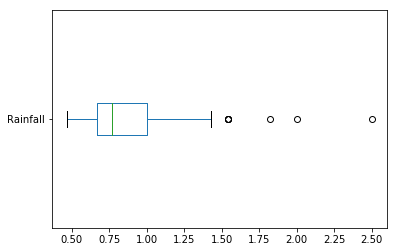

In [20]:
df_subsample_rain.plot(kind = 'box', vert=False)

Looking at the box plot and the histogram we can see that low levels of rain occur more frequent. In our box plot the median is skewed towards the left as opposed to the middle. In our histogram, the data takes the shape of a stiarcase not like a bellcurve like we would have liked. We often call the a right skewed distrubution as the long tail is on the right. 

## Working with Samples
In most real world examples we wont have access to the full population and in the case that would be a lot of data to manage. Generally you will work with sample of data that representative of the data and use asmple statistics such as mean and standard deviation to approximate the parameters of the full data population.

The general rule is the larger the sample the better appoximation the distubution of the full population. Alternatively each sample has a sample mean which we can record to form a sampling distribution. With enough samples two thigns happen, one is that the sampling distribution will take on a normal shape reardless of the shape of the population due to the central limit theorem and that the mean of the sampling distribution will be the population mean. 

## Correlation
Using statistics we want to find relationships between different fields in our data. Lets first pull out our temperature and sales data.


In [21]:
df_sub_temp_sales = df[["Temperature","Sales"]].sample(20).sort_index()
df_sub_temp_sales.head()

,Temperature,Sales
Date,,
2017-01-08,37.5,15
2017-01-12,38.2,14
2017-01-17,32.2,14
2017-01-24,28.6,12
2017-01-31,40.4,18


Next we want to plot our data to see if our eyes can recognize a pattern 

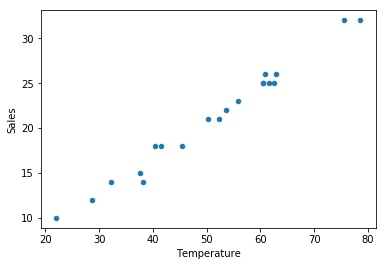

In [22]:
df_sub_temp_sales.plot(x = 'Temperature', y = 'Sales', kind = 'scatter')

We notice that as temperature increases we can also see sales increase. We can quantify this relationship by calculating a statistic called correlation. Correrlation values are between 1 and -1 where where the value of represents a positive relationship -1 represent a negitive correrlation which means an increase in one value will represent a decrease in the other field. 

Note correlation is not the same thing as casusation. While we see that this statistic shows us that higher sale tend to occur on sayds with higher temperatures that does not mean that Rosies sells more lemonade because it's hot. The stat could also be used to say that more lemonade Rosies sells the hotter the weather gets. 

## Hypothesis Testing
In this notebook we have seen how to start making hypotheses about the relationships in our data by combining our statistics of correlations with our sample distribution and some probability to start making
hypotheses about our data and testing them. Hypothesis testing is a corner stone of data science and their are many factors to consider and we will be doing a quick look. 

Suppose we have a full population of lemonade data.



In [23]:
df_mean_temp = df.Temperature.mean()
df.Sales.mean()

25.323287671232876

In [24]:
df_sales_sample = df[df.Temperature > df_mean_temp].sample(30)
df_sales_sample.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue,Unnamed: 8
Date,,,,,,,,
2017-06-06,Tuesday,84.2,0.56,44,0.3,34,10.2,NaN
2017-10-24,Tuesday,61.5,0.74,48,0.3,25,7.5,NaN
2017-04-26,Wednesday,62.5,0.80,48,0.3,25,7.5,NaN
2017-07-28,Friday,87.4,0.51,58,0.5,38,19.0,NaN
2017-06-12,Monday,93.0,0.50,67,0.3,40,12.0,NaN


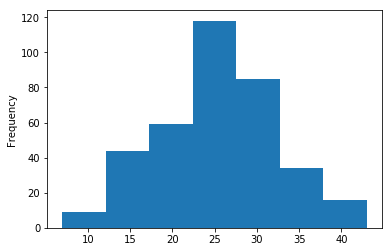

In [25]:
df.Sales.plot(kind = 'hist', bins = 7)

In [26]:
df_sales_sample.Sales.mean()

30.0

Our null hypothese is the mean sales for hot days = mean sales for population
Sales are not higher on hot days

The seoncd hypothesis is for mean sale for hot days > mean sales for population 
Sales are are higher on hot days

How unlikely does our sample mean need to be for use to conclude that it was more than due more than random chance. 
We determine if the value is significantly higher than the population mean, we usually indicate this value by the greek letter Alpha.

If we know the std of the full population we can take a Z test but tipically we dont have that infomation and we instead conduct a T-test. With a big enough sample a T-test will work just as well as a Z-test.
Z Test will return a P-Value which the actual the proability of obversing a sample mean atleast as far as the sample mean purely by random chance. 

If the Alpha is greater than our P-Value we will reject our null hypothesis and accept our alternative hypothesis.


